<img src="images/logo_combi.jpg" width=500>

In [39]:
import pandas as pd
import datetime as dt
import numpy as np

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

# Is it possible to predict customer behaviour in retail shops?

Generating customer loyalty and, more specifically, customer retention, is one of the fundamental ways by which businesses increase their profitability. 

Customers are nowadays more unfaithful than ever. In e-commerce customers are usually registered users of a website and their (our) behaviour is monitorized closely. In physical, brick-and-mortar retail shops customers are retained most often through the use of _fidelity cards_.

Data Science has much to say in providing predictive models for customer behaviour that help businesses increase their profitability. _Customer churn_ prediction is a clear example of such an application, as it allows to center marketing actions around customers with highest defection probability.

What we propose today goes very much in the direction of being able to offer individualized marketing actions targeted at each specific customer. The main question is: given a customer's shopping history at a shop, can we predict the date of their next purchase and the amount they will spend?

# Description of the customer transaction datasets

## Features dataset

The dataset `X` contains anonymized basket data from transactions carried out by individual identified customers of a series of shops belonging to a series of chains of retail shops specialised in groceries in the province of Barcelona.

Transactions occur between dates `2016-01-01` and `2018-01-11`.

The available features are as follows:

### Transaction-specific features: 

These are common to all rows in the same transaction.

- **transaction**: identifies rows of the same purchase
- **customer**: customer identifier. Identifies customers across shops of the same chain
- **chain**: chain identifier
- **shop**:  shop identifier
- **seller**: seller identifier. Identifies a seller across shops of the same chain
- **timestamp**: timestamp identifying the moment in which the transaction was checked out


### Row-specific features:

These apply to individual products (ie: rows) available in the transaction.

- **product**: product identifier. Identifies a product across shops of the same chain
- **quantity**: amount of product bought
- **billing**: money paid (in €) for the specified amount of product

The data types are as specified below.

In [97]:
dtype_X = {
    'transaction': np.int64,
    'customer': str,
    'chain': str,
    'shop': str,
    'seller': str,
    # 'timestamp': timestamp,
    'product': str,
    'quantity': np.float64,
    'billing': np.float64,
}

In [98]:
X = pd.read_csv('datasets/X.csv', dtype=dtype_X, parse_dates=['timestamp'])

By querying for a fixed `'transaction'`, we get all rows related to it. For example, `transaction = 818445` contains the following rows:

In [99]:
X[X['transaction'] == 818445]

,transaction,timestamp,chain,shop,customer,seller,product,quantity,billing
7,818445,2016-01-02 07:22:31,w6,nRq,uhEla,SAr,QlLha,0.160,3.17
8,818445,2016-01-02 07:22:31,w6,nRq,uhEla,SAr,xDTzd,0.165,3.27
9,818445,2016-01-02 07:22:31,w6,nRq,uhEla,SAr,45p35,1.000,2.75
10,818445,2016-01-02 07:22:31,w6,nRq,uhEla,SAr,eo~UP,0.180,3.56
11,818445,2016-01-02 07:22:31,w6,nRq,uhEla,SAr,5lqld,0.290,4.21


## Data size summary

The X dataset contains ~2.3M rows, corresponding to ~474K unique individual transactions. There are ~8.7K unique identified customers.

More precisely:

In [100]:
X.shape

(2281130, 9)

In [101]:
X.transaction.nunique()

473772

In [102]:
X.customer.nunique()

8723

## Target dataset

The dataset `y` contains, for each customer appearing in `X`, the date of the first purchase they effected after `2018-11-01` together with its total billing amount.

The datatypes of its columns are as follows:

In [103]:
dtype_y = {
    'customer': str,
    'billing': np.float64,
    # 'date': date,
}

In [104]:
y = pd.read_csv('datasets/y.csv', dtype=dtype_y, parse_dates=['date'])

[64.12 34.98 18.93 ... 23.4  50.76 62.54]
930.66


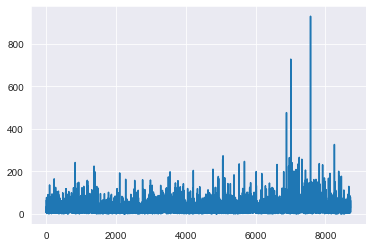

   transaction           timestamp chain shop customer seller product  \
0       903247 2016-01-02 07:17:27    w6  7M4    ~G2K8    du~   ozQLP   
1       903247 2016-01-02 07:17:27    w6  7M4    ~G2K8    du~   5lqld   
2       903247 2016-01-02 07:17:27    w6  7M4    ~G2K8    du~   5lqld   
3       903247 2016-01-02 07:17:27    w6  7M4    ~G2K8    du~   u9~9z   
4       903247 2016-01-02 07:17:27    w6  7M4    ~G2K8    du~   MDeT9   

   quantity  billing  
0     0.385    10.74  
1     0.070     1.02  
2     0.285     4.13  
3     0.060     1.13  
4     0.190     2.07  


In [142]:

from sklearn.linear_model import LinearRegression
regression = LinearRegression()

Y= y.iloc[:,1].values
print(Y)
print(max(Y))
plt.plot(Y)
plt.show()
print(X.head())

## __Question:__ how do we go from features `X` to target `y`?

__Answer:__ Standard dataframe manipulations, that is: discard most columns, group-by, aggregate `billing`, compute dates from timestamps.

In [105]:
from_X_to_y = (X[['transaction', 'timestamp', 'customer', 'billing']]
               .groupby(['transaction', 'timestamp', 'customer'])
               .agg('sum')
               .reset_index())

from_X_to_y['date'] = from_X_to_y['timestamp'].dt.date
from_X_to_y.drop('timestamp', axis=1, inplace=True)

In this way, our previous transaction number `818445` turns into:

In [106]:
X[X['transaction'] == 818445]

,transaction,timestamp,chain,shop,customer,seller,product,quantity,billing
7,818445,2016-01-02 07:22:31,w6,nRq,uhEla,SAr,QlLha,0.160,3.17
8,818445,2016-01-02 07:22:31,w6,nRq,uhEla,SAr,xDTzd,0.165,3.27
9,818445,2016-01-02 07:22:31,w6,nRq,uhEla,SAr,45p35,1.000,2.75
10,818445,2016-01-02 07:22:31,w6,nRq,uhEla,SAr,eo~UP,0.180,3.56
11,818445,2016-01-02 07:22:31,w6,nRq,uhEla,SAr,5lqld,0.290,4.21


In [107]:
from_X_to_y[from_X_to_y['transaction'] == 818445]

,transaction,customer,billing,date
404677,818445,uhEla,16.96,2016-01-02


# A single customer's shopping time series

Let us focus on customer `'uhEla'`, who carried out transaction number `818445`. We will explore the time series of the total `billing` for each of his purchases.

In [108]:
# Drop `'transaction'`.
from_X_to_y.drop('transaction', axis=1, inplace=True)

Let's stay with this customer and examine the time-series of shop purchases:

In [109]:
X_one_customer = (from_X_to_y[from_X_to_y['customer'] == 'uhEla']
                  .sort_values('date')
                  .drop('customer', axis=1))

In [110]:
X_one_customer.shape

(143, 2)

We can tell that this customer has effected a total of 143 different purchases along time. Let us visualize the last 60 of them:

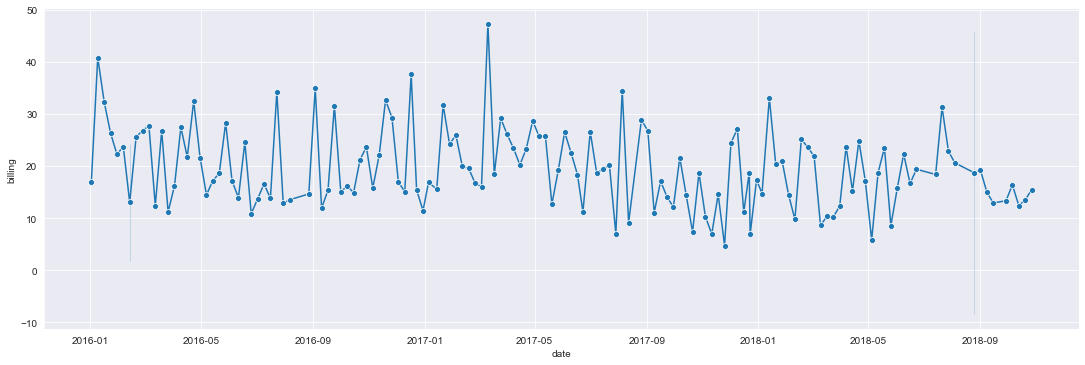

In [111]:
_ = sns.relplot(x='date', y='billing', kind='line', data=X_one_customer.tail(143), aspect=3, marker='o')

One way to study the date for the next purchase is to look at the number of days which go by between consecutive transactions. 

Let us look at this feature in the case of this single customer.

First, we take the date of the first and final purchases.

In [112]:
initial_date = X_one_customer.date.iloc[0]
final_date = X_one_customer.date.iloc[-1]

Then, we count the number of days between each purchase date and the initial date.

In [113]:
X_one_customer['date_int'] = X_one_customer['date'].apply(lambda x: (x - initial_date).days)

Finally, compute the number of days between consecutive purchases as an integer.

In [117]:
X_one_customer['date_int_sh'] = X_one_customer['date_int'].shift(1)
X_one_customer['date_diff'] = X_one_customer['date_int'] - X_one_customer['date_int_sh']


Let us visualize the time series for the `'date_diff'` feature.

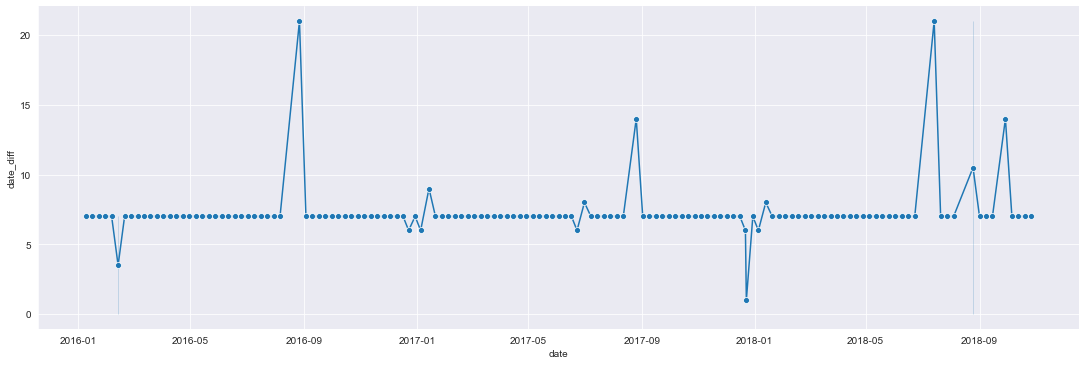

In [62]:
_ = sns.relplot(x='date', y='date_diff', kind='line', data=X_one_customer.tail(143), aspect=3, marker='o')

In [25]:
X_one_customer.tail()

,billing,date,date_int,date_int_sh,date_diff
415903,13.36,2018-09-29,1001,987.0,14.0
416005,16.40,2018-10-06,1008,1001.0,7.0
416066,12.44,2018-10-13,1015,1008.0,7.0
416140,13.49,2018-10-20,1022,1015.0,7.0
416244,15.46,2018-10-27,1029,1022.0,7.0


What is the average for the `'billing'` and `'date_diff'` features?

In [26]:
X_one_customer[['billing', 'date_diff']].mean()

billing      19.493217
date_diff     7.246479
dtype: float64

By adding the rounded value of date_diff to `final_date`, we would get an _average_ estimation of the following purchase date

In [27]:
final_date + dt.timedelta(7)

datetime.date(2018, 11, 3)

As a conclusion, let's look at the real value and compare:

In [28]:
y_one_customer = y[y['customer'] == 'uhEla'].drop('customer', axis=1)
y_one_customer

,billing,date
953,15.4,2018-11-03


# Fitting of a dummy model

In the end, given one customer, we have to predict a date and a billing.

A dummy model is a simple way to establish a baseline for more sophisticated models to improve upon. It always predicts the average of the values which are to be regressed (or the most frequent class if we are classifying).

By repeating the above procedure for each single customer in the dataset, we get our targets.

In [29]:
def predict(X):
    # Let us extract a time-series for each customer.
    from_X_to_y = (X[['transaction', 'timestamp', 'customer', 'billing']]
                   .groupby(['transaction', 'timestamp', 'customer'])
                   .agg('sum')
                   .reset_index())
    
    # Extract dates from timestamps.
    from_X_to_y['date'] = from_X_to_y['timestamp'].dt.date
    
    # Drop unneeded columns.
    from_X_to_y.drop(['timestamp', 'transaction'], axis=1, inplace=True)
    
    # We'll put each answer as a dictionary in this list.
    answers = list()
    
    # Iterate over customers.
    for customer in X.customer.unique():
        # Keep only data related to this customer
        X_one_customer = (from_X_to_y[from_X_to_y['customer'] == customer]
                          .sort_values('date')
                          .drop('customer', axis=1))
        
        # Work out initial and final purchase dates.
        start_date = X_one_customer.date.iloc[0]
        end_date = X_one_customer.date.iloc[-1]
        
        # Count number of days from initial date for each purchase date.
        X_one_customer['date_int'] = X_one_customer['date'].apply(lambda x: (x - start_date).days)
        
        # Count the number of days elapsed between consecutive purchases.
        X_one_customer['date_int_sh'] = X_one_customer['date_int'].shift(1)
        X_one_customer['date_diff'] = X_one_customer['date_int'] - X_one_customer['date_int_sh']
        
        # Compute the average of billings.
        billing_pred = X_one_customer.billing.mean()
        
        # Compute the average of date_diff and round.
        # Then, if the predicted date is below 2018-11-02, predict 2018-11-02.
        date_pred = pd.to_datetime(
            max(end_date + dt.timedelta(days=round(X_one_customer.date_diff.mean())),
                dt.date(2018, 11, 2))
        )
        
        # Append computed answer to the list of answers
        answers.append({
            'customer': customer,
            'billing': billing_pred,
            'date': date_pred
        })
    
    # After computing the prediction for all customers, 
    # return the list of dictionaries as a dataframe.
    return pd.DataFrame(answers)

If we were to train the whole dataset on this simple, dummy model, which computes nothing more than a couple of means, it would take us some time.

In [30]:
%%time
yhat = predict(X)

CPU times: user 4min 8s, sys: 1.01 s, total: 4min 9s
Wall time: 4min 13s


This should discourage any brute-force attempts: there is a **lot** of training data available.

A `score` method has been provided for the sake of being able to compute validations.

In [32]:
from src.validations import score

score(y, yhat)

0.044136191677175286

The performance of such a _dummy_ model is very poor, but it should already serve as a baseline for comparing your first models.

# Fitting a model on the validation set

The validation data set is of the same nature as `X`.

In [33]:
X_val = pd.read_csv('datasets/X_val.csv', dtype=dtype_X, parse_dates=['timestamp'])

The job is to apply the `predict` method to this dataset:

In [34]:
%%time
y_pred = predict(X_val)

CPU times: user 8.72 s, sys: 65.5 ms, total: 8.78 s
Wall time: 8.85 s


## Submitting our answer to the live tracking system

Gerardo Parreño has kindly made a method available for submitting data. Assuming that your team metadata and `token` have been stored in the [src/config.ini](src/config.ini) file, then making a submission is as simple as executing:

In [38]:
from src.client import submit_predictions

submit_predictions('src/config.ini', y_pred)

ConnectionError: HTTPConnectionPool(host='datathon.intelliris.net', port=3000): Max retries exceeded with url: /predictions (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f8c326d1310>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))

A successful submission should return a `201` http response status.

For the record, this submission would achieve an accuracy of `0.046218`.